# Linear Regression using gradient descent

see [cs229 notes](https://cs229.stanford.edu/notes2020fall/notes2020fall/cs229-notes1.pdf) for details

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "1"

In [2]:
sklearn.__version__

'1.0.1'

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator,RegressorMixin

In [4]:
X,y, coeff = make_regression(n_samples=1000, n_features=1,coef=True, noise=20)

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
sns.set_theme(style="darkgrid")

In [7]:
X.shape

(1000, 1)

In [8]:
train_X,test_X, train_y, test_y = train_test_split(X,y, test_size=0.2,random_state=42)

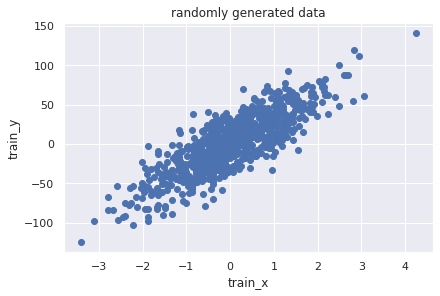

In [9]:
fig,axes = plt.subplots(1, layout='constrained')
axes.scatter(train_X,train_y)
plt.xlabel('train_x')
plt.ylabel('train_y')
plt.title('randomly generated data')
plt.show()

## Approach : Gradient descent 


$ \theta_j := \theta_j - \frac{2\alpha}{m}\Sigma_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j$

In [10]:
class GDRegressor(BaseEstimator, RegressorMixin):
    
    def __init__(self,alpha=1,n_iter=10000):
        self.alpha = alpha
        self.n_iter = n_iter
    
    def fit(self,X,y):
        X=np.hstack((np.ones((len(X),1)),X)) #adding intercept term to each training example (m,n+1)
        y=y.reshape(len(y),1) #reshaping to column vector
        m=len(y)
        theta = np.random.rand(X.shape[1] ,1) # (n+1,1)
        
        for i in range(0,self.n_iter):
            gradient = 2 * X.T.dot(X.dot(theta) - y)/m # Gradient
            theta = theta - self.alpha * gradient #see cs229 notes
        self.coef = theta
        return self
    
    def predict(self, X=None):
        X=np.hstack((np.ones((len(X),1)),X))
        return X.dot(self.coef)
    

In [11]:
reg = GDRegressor(alpha=0.2)

In [12]:
reg.fit(train_X,train_y)

GDRegressor(alpha=0.2)

In [13]:
train_pred = reg.predict(train_X)

In [14]:
lin_mse = mean_squared_error(train_y,train_pred)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

20.24912349372604

In [15]:
lin_scores = cross_val_score(reg, train_X,train_y,scoring='neg_mean_squared_error', cv=5) # cv requires utility function
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([20.05092991, 19.81791538, 19.9913549 , 21.22807826, 20.27676093])

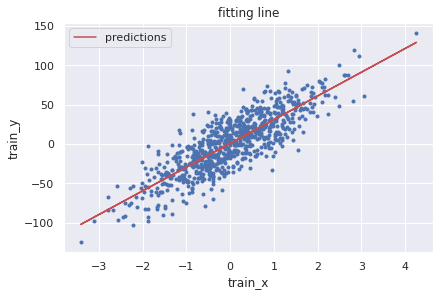

In [16]:
fig,axes = plt.subplots(1, layout='constrained')
axes.plot(train_X,train_y, "b.")
axes.plot(train_X,train_pred,"r-", label="predictions")
plt.xlabel('train_x')
plt.ylabel('train_y')
plt.title('fitting line')
plt.legend()
plt.show()

In [17]:
reg.score(train_X,train_pred)

1.0

In [18]:
reg.get_params()

{'alpha': 0.2, 'n_iter': 10000}

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid ={'alpha': [0.01,0.1, 1], 'n_iter': [10000,15000,20000,1000]}
gdreg = GDRegressor()

In [21]:
grid_search = GridSearchCV(gdreg, param_grid, cv=5)

In [22]:
grid_search.fit(train_X,train_y)

/tmp/ipykernel_53906/1946996494.py:14: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * X.T.dot(X.dot(theta) - y)/m # Gradient
/tmp/ipykernel_53906/1946996494.py:15: RuntimeWarning: invalid value encountered in subtract
  theta = theta - self.alpha * gradient #see cs229 notes
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/base.py", line 701

/tmp/ipykernel_53906/1946996494.py:14: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * X.T.dot(X.dot(theta) - y)/m # Gradient
/tmp/ipykernel_53906/1946996494.py:15: RuntimeWarning: invalid value encountered in subtract
  theta = theta - self.alpha * gradient #see cs229 notes
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/base.py", line 701

/tmp/ipykernel_53906/1946996494.py:14: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * X.T.dot(X.dot(theta) - y)/m # Gradient
/tmp/ipykernel_53906/1946996494.py:15: RuntimeWarning: invalid value encountered in subtract
  theta = theta - self.alpha * gradient #see cs229 notes
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/base.py", line 701

GridSearchCV(cv=5, estimator=GDRegressor(),
             param_grid={'alpha': [0.01, 0.1, 1],
                         'n_iter': [10000, 15000, 20000, 1000]})

In [23]:
lin_reg = grid_search.best_estimator_

In [26]:
lin_reg.get_params

<bound method BaseEstimator.get_params of GDRegressor(alpha=0.1)>

In [24]:
test_pred = lin_reg.predict(test_X)

In [25]:
test_rmse = np.sqrt(mean_squared_error(test_y,test_pred))
test_rmse #no sign of overfitting, notice the noise was 20 when data was generated

21.28470705971814

## Comparsion with sklearn's ordinary least squares

In [27]:
olsq = LinearRegression()

In [28]:
olsq.fit(train_X,train_y)

LinearRegression()

In [29]:
train_pred_olsq = olsq.predict(train_X)

In [30]:
np.sqrt(mean_squared_error(train_y,train_pred_olsq))

20.24912349372604

In [31]:
test_pred_olsq = olsq.predict(test_X)

In [32]:
np.sqrt(mean_squared_error(test_y,test_pred_olsq))

21.284707059718144